Demo notebook where we will run our algorithm against test samples.

In [1]:
import sys

sys.path.append("../src")

In [2]:
"""Molecular Docking main module."""
from graph.mapping import embed_problem_to_QPU
from rdkit import Chem

from draw.features import draw_docking, draw_feature_list
from draw.graph import draw_interaction_graph
from graph.interaction_graph import (
    InteractionNode,
    build_binding_interaction_graph,
    build_distance_matrix,
)
from mol_processing.features import name_features_by_count
from mol_processing.mol import get_features
from pulser.devices import Chadoq2

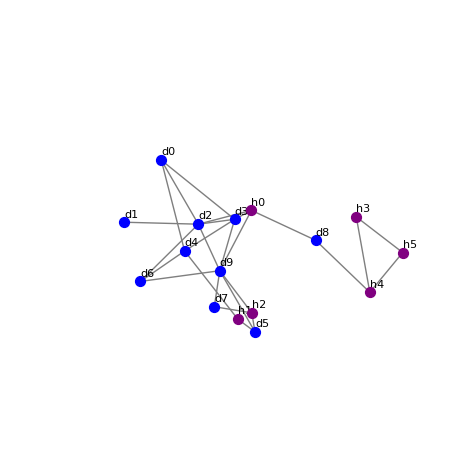

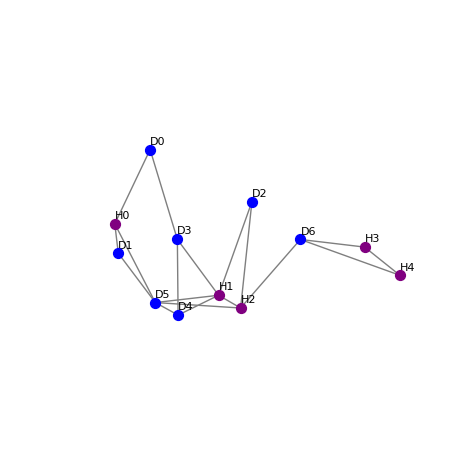

In [3]:
mol = Chem.MolFromPDBFile("../data/receptors/1AO2.pdb", sanitize=True, removeHs=False)
R_features = get_features(mol, "receptor")[1::3]
L_features = get_features(mol, "ligand")[1::4]

name_features_by_count(R_features, is_ligand=False)
name_features_by_count(L_features, is_ligand=True)

R_distance_matrix = build_distance_matrix(R_features)
L_distance_matrix = build_distance_matrix(L_features)

draw_feature_list(R_features, R_distance_matrix)
draw_feature_list(L_features, L_distance_matrix)

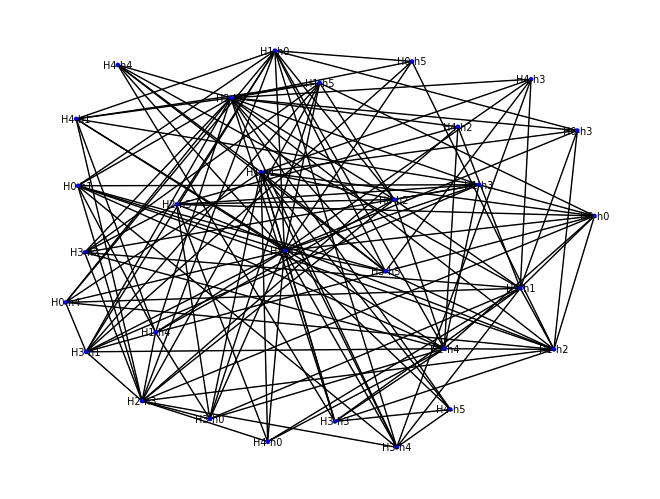

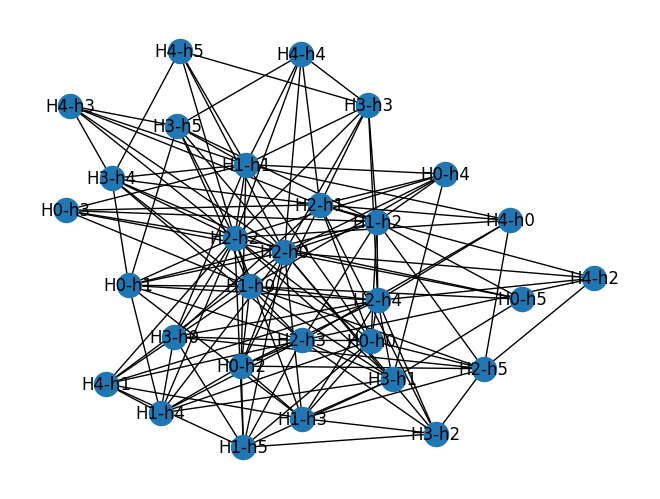

In [4]:
import networkx as nx

interaction_graph = build_binding_interaction_graph(L_distance_matrix, R_distance_matrix)
draw_interaction_graph(interaction_graph)
pos = nx.spring_layout(interaction_graph)  # , seed=39299899
nx.draw(
    interaction_graph,
    pos=pos,
    with_labels=True,
    node_color="tab:blue",
)

In [ ]:
from solver.classical import find_max_clique

max_clique = find_max_clique
print(max_clique)

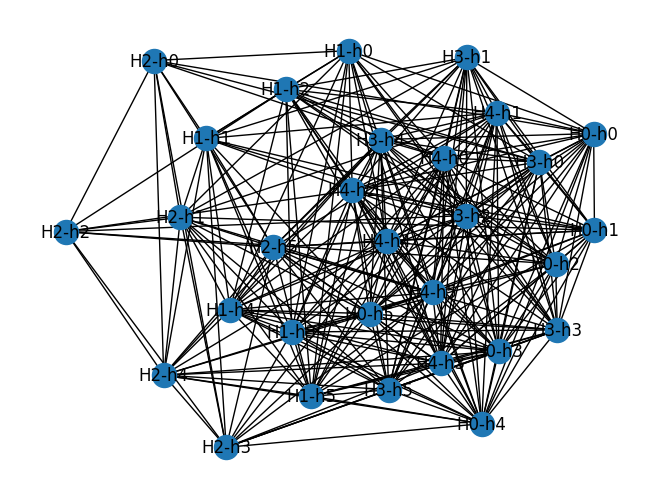

In [5]:
# MAPPING TO UDG

from graph.mapping import *

compl = build_complementary_graph(interaction_graph)
pos = nx.spring_layout(compl)  # , seed=39299899

nx.draw(
    compl,
    pos=pos,
    with_labels=True,
    node_color="tab:blue",
)

Problem while generating UDG graph: the number of resulting edges is not equal to the inital number of  edges.


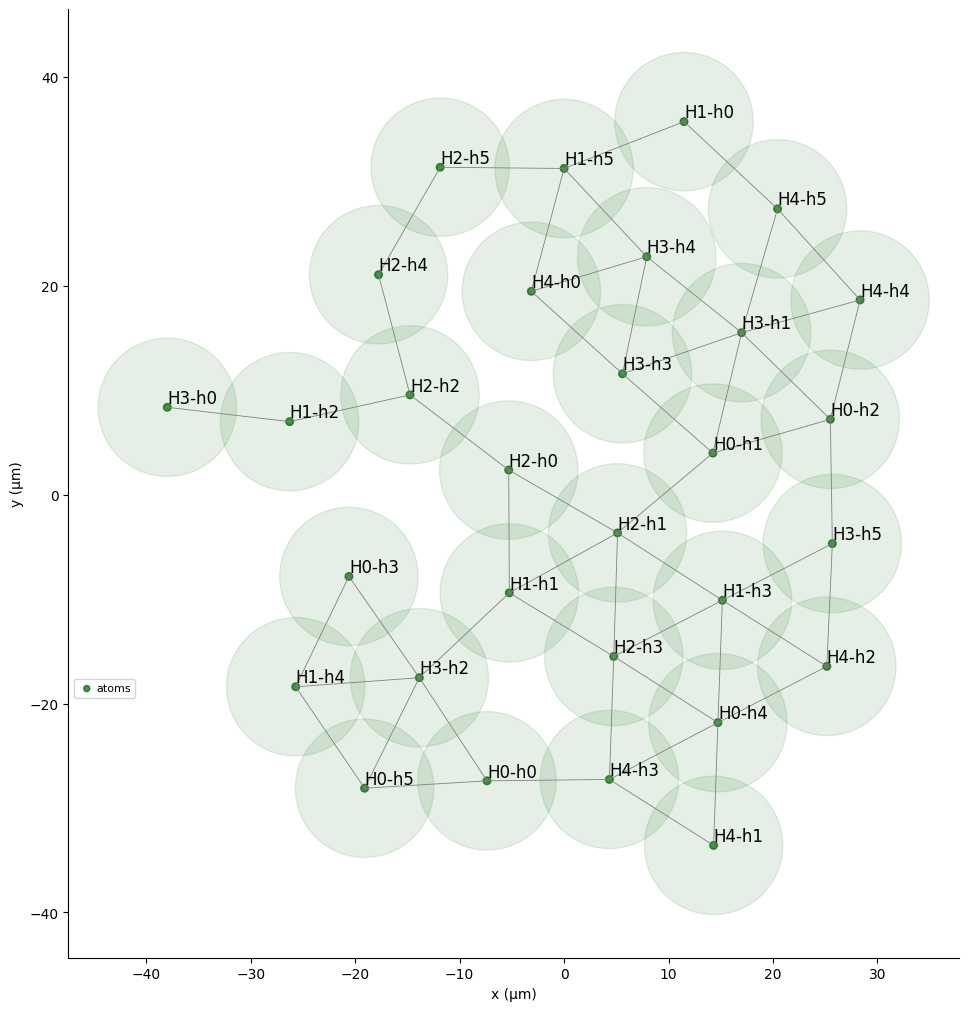

In [6]:
register = embed_problem_to_QPU(interaction_graph)

register.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0), draw_graph=True, draw_half_radius=True
)

<function find_max_clique at 0x1074171a0>


In [8]:
# QUANTUM SOLVER

In [9]:
# RESULT TO DOCKING POSES LIST

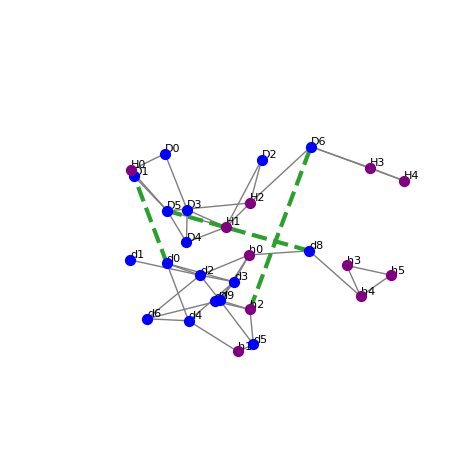

In [10]:
docking = [
    InteractionNode(R_feature=R_features[0], L_feature=L_features[1], weight=10),
    InteractionNode(R_feature=R_features[8], L_feature=L_features[5], weight=10),
    InteractionNode(R_feature=R_features[12], L_feature=L_features[6], weight=10),
]

draw_docking(
    L_features,
    L_distance_matrix,
    R_features,
    R_distance_matrix,
    interacting_nodes=docking,
)